## **Análisis exploratorio de datos**

### **0. Guía**

<img src='Imágenes\EDA.PNG'>


| Fuente | Detalle |
|  :---:  |---------|
| Guía práctica de Introducción al AED, España | [Guía pública](https://datos.gob.es/es/) |

### **1. Dataset**

| Aspecto | Detalle |
|  :---:  |---------|
| Nombre | US Honey Production 1995-2021 🍯🐝 |
| Fuente | Honey Production data by National Agricultural Statistics Service, USDA |
| url | [dataset de Kaggle.com](https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021) |
| Tamaño | < 10.000 datos |

### **2. Análisis descriptivo**

#### **2.1 Lectura de datos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
print('\nContenido del dataset de estudio\n')
dataH = pd.read_csv('US_honey_dataset_updated.csv', index_col = 0)
dataH


Contenido del dataset de estudio



,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


Visualización inicial del df. La primera columna del ds con numeración de filas es utilizada como *index columna*, usando el parámetro *index_col = 0*.

##### **2.1.1 Previsualización de datos**

In [3]:
print('\nPrincipales características del dataset:\n')

#Estructura del dataset
filas, columnas = dataH.shape
producto = dataH.size

#tipos de datos por variable
Otype = 0
Itype = 0
Ftype = 0

for columna in dataH.columns:
  tdato = dataH.dtypes[columna]
  if tdato == 'O':
    Otype += 1
  elif tdato == 'float64':
    Ftype += 1
  elif tdato == 'int64':
      Itype += 1
  else:
        print('Tipo de dato no identificado')
        
#rango temporal del dataset
fmin = dataH['year'].min()
fmax = dataH['year'].max()

print(f'- El número total de entradas del conjunto de datos es de {filas}.')
print(f'- El número total de variables es de {columnas}, {Otype} variable de tipo objeto, {Ftype} de tipo decimal y {Itype} de tipo entero.')
print(f'- El número total de observaciones es de {producto}.')
print(f'- El rango temporal va desde {fmin} hasta {fmax}.')

#variables categóricas
for columna in dataH.columns:
  tdato = dataH.dtypes[columna]
  if tdato == object:
    print(f'- La variable categoríca "{columna}" permite organizar las entradas de acuerdo con el estado donde se ubican los productores de miel en US.')

#variables numéricas
print('- Las varibales numéricas del conjunto son:')
numericas = []
for columna in dataH.columns:
  tdato = dataH.dtypes[columna]
  if (tdato == 'float64' or tdato == 'int64'):
    numericas.append(columna)
print('\t',numericas)


Principales características del dataset:

- El número total de entradas del conjunto de datos es de 1115.
- El número total de variables es de 8, 1 variable de tipo objeto, 1 de tipo decimal y 6 de tipo entero.
- El número total de observaciones es de 8920.
- El rango temporal va desde 1995 hasta 2021.
- La variable categoríca "state" permite organizar las entradas de acuerdo con el estado donde se ubican los productores de miel en US.
- Las varibales numéricas del conjunto son:
	 ['colonies_number', 'yield_per_colony', 'production', 'stocks', 'average_price', 'value_of_production', 'year']


Adicional a las observaciones arriba y para análisis posteriores, **se puede considerar la variable *"year"* como categórica**, dado que las filas de datos pueden ser agrupadas de acuerdo con sus valores o rangos de ellos.

#### **2.2 Manejo de valores faltantes**

In [4]:
print('\nValores nulos (NA) por variable')
#cantidad de nulls por variable
dataH.isnull().sum(axis = 0)


Valores nulos (NA) por variable


state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

El dataset **no presenta celdas con valores *nulls o NA***. Por lo tanto, esta es la información de partida para posteriores análisis.

#### **2.3 Valores únicos de variables**

In [5]:
est = dataH['state'].unique()
est_unicos = est.size #función de numpy
años = dataH['year'].unique()
años_unicos = años.size
print('Valores únicos de state:',est_unicos,'\n', est)
print('\nValores únicos de year:',años_unicos,'\n', años)

Valores únicos de state: 44 
 ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'NewJersey'
 'NewMexico' 'NewYork' 'NorthCarolina' 'NorthDakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'SouthCarolina' 'SouthDakota' 'Tennessee' 'Texas'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'WestVirginia' 'Wisconsin'
 'Wyoming']

Valores únicos de year: 27 
 [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


Traemos arriba los valores únicos de las dos variables categóricas consideradas en el análisis: ***'state' y 'year'***.

#### **2.4 Representación gráfica**

[Text(0.5, 1.0, '\nHistograma colonies_number\n')]

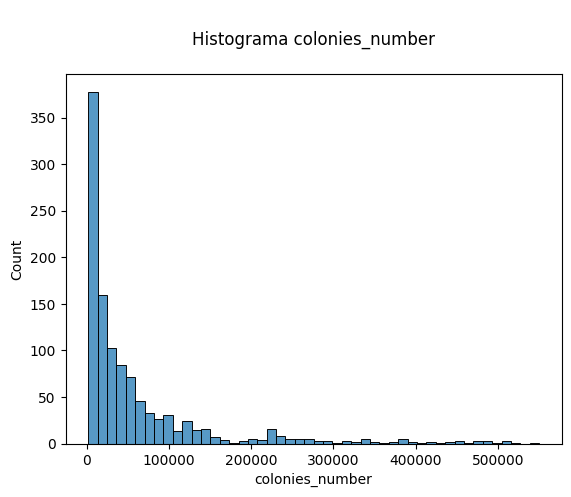

In [6]:
#histograma 'colonies_number'
sns.histplot(dataH['colonies_number']).set(title = '\nHistograma colonies_number\n')

In [7]:
print('Cuartiles de la variable colonies_number')
print('Q75% = ',dataH['colonies_number'].quantile(0.75),'\nQ100% = ', dataH['colonies_number'].quantile(1))


Cuartiles de la variable colonies_number
Q75% =  69000.0 
Q100% =  550000.0


***Variable 'colonies_number'***

De acuerdo con el resumen estadístico del dataset presentado arriba y el histograma de la variable 'colonies_number', se considera lo siguiente:

- El 75% de los datos de la variable están por debajo de 69.000 colonias.
- El último 25% de los datos está entre 69.000 - 550.000 colonias.

Esto muestra un marcado sesgo de los datos de la variable hacia la izquierda (más cercanos al valor 0), es decir, las entradas del dataset tienen en su gran mayoría un número de colonias por debajo de la media actual de esta variable (< 62.438 colonias).

¿Se presentan outliers en este caso? El diagrama de cajas muestra una más adecuada representación de este análisis.


[Text(0.5, 1.0, '\nDiagrama de cajas colonies_number\n')]

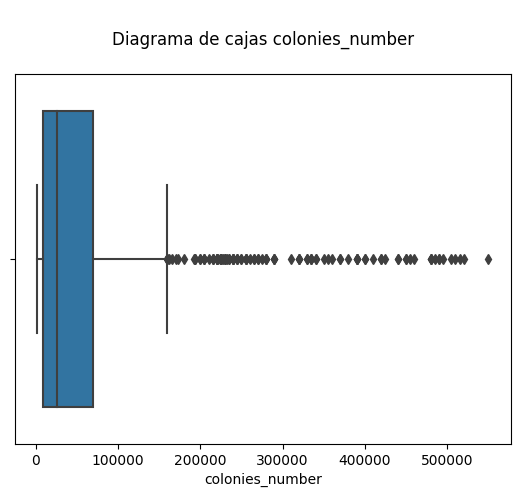

In [8]:
#Diagrama de cajas 'colonies_number'
sns.boxplot(data = dataH, x = 'colonies_number').set(title = '\nDiagrama de cajas colonies_number\n')

Entonces, se indagará sobre la causalidad para considerar los datos por encima del valor máximo entregado por el diagrama de cajas. Para esto, **se incluye en el análisis gráfico a las categorías *'state' y 'year'*** (variable numérica), para separar por grupos de datos.

Sin embargo, previamente se mapean los datos brutos, dado que hablamos de más de 40 estados y más de 20 años, lo que dificulta una correcta visualización de histogramas y diagramas de caja.
